# HW4 E94041173 張竣佑

## Data Description:本資料為遊戲dota2的某些資訊，以下介紹之
### data1:本遊戲的輸贏(-1為輸1為贏)
### data2:遊戲的cluster id(<=223)
### data3:Game_mode
### data4:Game_type
### data5(欄位五到最後):為one-hot encoding的方式:由1與-1分別代表遊戲中兩個隊伍所選取的英雄，兩陣營各五隻，113隻英雄會選擇10隻

## Define Problem:藉由data2~data5(feature2~feature5) 預測遊戲最後的輸贏結果data1(label)

## 準備資料

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
train_data = pd.read_csv('./dota2Train.csv')
test_data = pd.read_csv('./dota2Test.csv')

train_x = train_data.drop('-1',axis=1)
train_y = train_data['-1']
test_x = test_data.drop('-1',axis=1)
test_y = test_data['-1']
print(train_x.shape);print(test_x.shape)
train_x.head(3)
# test_x.head(3)

(92649, 116)
(10293, 116)


,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,152,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,131,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,154,2,2,0,0,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,0


## Analyze the Data

### Baseline 分析

0.899245623385675


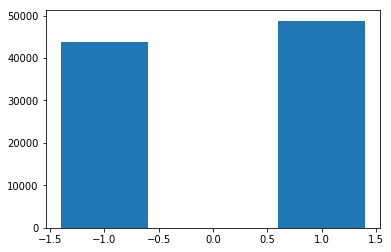

In [3]:
import matplotlib.pyplot as plt
x = [1,-1]
win = 0;loss = 0;
for i in train_y:
    if i == 1:
        win += 1
    else:
        loss += 1
y = [win,loss]
print(loss/win)
plt.bar(x,y)
plt.show()

### training_data 的輸贏比例分布為balance_data 先用猜測贏當作baseline_model

In [4]:
#test_data size = 10293
balance_pred = list()
for i in range(10293):
    balance_pred.append(1)
accuracy_score(balance_pred,test_y)

0.5345380355581463

### Correlation
### 使用pearson correlation查看feature2~4之間關係
### 使用spearman correlation 查看feature(data2~data4) 與 label(data1)的關係

In [5]:
data2 = train_data['223']
data3 = train_data['2']
data4 = train_data['2.1']
print('p_data2&data3: ',data2.corr(data3,'pearson'))
print('p_data2&data4: ',data2.corr(data4,'pearson'))
print('p_data3&data4: ',data3.corr(data4,'pearson'))
print('s_data2:',data2.corr(train_y,'spearman'))
print('s_data3:',data3.corr(train_y,'spearman'))
print('s_data4:',data4.corr(train_y,'spearman'))

p_data2&data3:  0.18533129969790804
p_data2&data4:  0.0003786084292159853
p_data3&data4:  -0.14759831609724913
s_data2: -0.0010547173765111416
s_data3: 0.00020056465632455693
s_data4: -0.0022865718633413414


## Problem
### 採用logistic_regression
### original_model:將data2~data4&data5(英雄選擇)當作features對應輸贏(label)做模型，先判斷與baseline_model的關係，其準確率約為0.597 > baseline(0.535) ，預期可有效增進準確率

In [6]:
clf = LogisticRegression()
clf.fit(train_x,train_y)
pred = clf.predict(test_x)
accuracy_score(pred,test_y)

0.5976877489556008

## Improvement
### 由前面的spearman與pearson correlation判斷data2~data4之間關係不明顯以及個別與輸贏的關係也較低，試試看只使用英雄資料(data5)當作features

In [7]:
train_x = train_x.drop('2.1',axis = 1)
train_x = train_x.drop('2',axis = 1)
train_x = train_x.drop('223',axis = 1)
test_x = test_x.drop('2',axis = 1)
test_x = test_x.drop('8',axis = 1)
test_x = test_x.drop('223',axis = 1)
clf = LogisticRegression()
clf.fit(train_x,train_y)
pred = clf.predict(test_x)
accuracy_score(pred,test_y)

0.5974934421451472

### 並未如預期展現的進步
### 嘗試調整模型參數

In [8]:
clf2 = LogisticRegression(penalty='l2',C=0.1)
clf2.fit(train_x,train_y)
pred = clf2.predict(test_x)
accuracy_score(pred,test_y)

0.5975905955503741

In [ ]:
from sklearn.svm import SVC
clf3 = SVC(kernel='linear')
clf3.fit(train_x,train_y)
pred = clf3.predict(test_x)
accuracy_score(pred,test_y)

### 結論 : 由分析相關係數可以發現data2~data4的關係低落，但只有data5英雄資料的表現並未優於前者，但準確率已高於baseline，代表仍有機會嘗試增進準確率
### original_model:baseline 以及 未處理features的Logistic_regression
### result:未處理features的Logistic_regression優於baseline
### approach:刪除data2~data4並調整參數
### improvement:目前並未有有效的進步